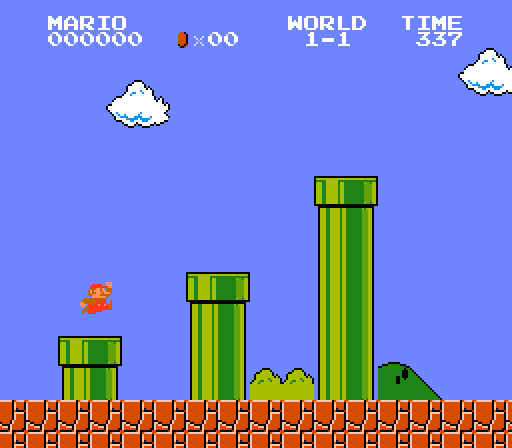

# Pipelines

<p style="line-height:1.75;font-size:16px">
In previous lessons we've seen that before training a model we usually have to pre-process the data first. Steps such as `get_dummies`, scaling and data imputation usually happen in sequence before any training can begin. Using sklearn's pipeline we can streamline the process of data transformation and make it more modular.

# Example

<p style="line-height:1.75;font-size:16px">
For this example we'll use the housing dataset from earlier. We want to perform the following transformations before training a model:<br>
1.<span style="line-height:1.75;font-size:16px">Transform categorical features using get_dummies.<br>
2.<span style="line-height:1.75;font-size:16px"> min-max scaling.<br>
Let's see how it's done.
<p style="line-height:1.75;font-size:16px">
First, we will have to create a custom transformer that will remove N\A values and perfrom get_dummies.

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_ = pd.get_dummies(X_)
        return X_

In [31]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


data = pd.read_csv('data/housing.csv')
data.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data.drop('median_house_value', axis=1), data['median_house_value'], train_size=0.8)

pipe = Pipeline([('custom_transform', CustomTransformer()), ('scaling', MinMaxScaler()), ('knn', KNeighborsRegressor(10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.699462766841046

# Stratified Data Splitting

In [37]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print('Original')
print(Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
print('Split')
print(Counter(y_train))
print(Counter(y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
print('Stratified')
print(Counter(y_train))
print(Counter(y_test))

Original
Counter({0: 94, 1: 6})
Split
Counter({0: 45, 1: 5})
Counter({0: 49, 1: 1})
Stratified
Counter({0: 47, 1: 3})
Counter({0: 47, 1: 3})
